<a href="https://colab.research.google.com/github/biswajitpolai/Bindi/blob/main/violence_euclidean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import time
import argparse

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import numpy as np

# Position of a person in two consecutive frames
prev_position = (100, 150)  # (x1, y1)
curr_position = (130, 170)  # (x2, y2)

# Compute Euclidean distance (movement)
distance = np.sqrt((curr_position[0] - prev_position[0])**2 + (curr_position[1] - prev_position[1])**2)

# Threshold: Large distance may indicate violence
if distance > 50:
    print("Potential violent action detected!")
# Positions of two people in a frame
person1 = (200, 300)  # (x1, y1)
person2 = (220, 320)  # (x2, y2)

# Compute Euclidean distance
interaction_distance = np.sqrt((person2[0] - person1[0])**2 + (person2[1] - person1[1])**2)

# Threshold: If people get too close suddenly, possible fight
if interaction_distance < 30:
    print("Possible physical altercation detected!")
# Hand and head positions
fist = (250, 400)  # Hand (fist) position
head = (260, 450)  # Victim's head position

# Compute distance
fist_to_head_distance = np.sqrt((head[0] - fist[0])**2 + (head[1] - fist[1])**2)

# If the hand moves too close to the head, possible punch
if fist_to_head_distance < 20:
    print("Possible punch detected!")


Possible physical altercation detected!


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from ultralytics import YOLO

# Load pre-trained YOLO model
model = YOLO("yolov8n.pt")

# Open video file
#!curl -o logo.png /content/WhatsApp Video 2025-02-16 at 14.04.57.mp4
#import cv2
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)

cap = cv2.VideoCapture("/content/WhatsApp Video 2025-02-16 at 20.30.36.mp4")
assert cap.isOpened(), "Error reading video file"

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO to detect people
    results = model(frame)
    centers = []

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            centers.append((x_center, y_center))

            # Draw bounding box & center
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.circle(frame, (x_center, y_center), 5, (0, 0, 255), -1)

    # Check distance between people
    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            x1, y1 = centers[i]
            x2, y2 = centers[j]
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

            if distance < 50:  # Threshold for close contact (possible fight)
                print("Possible violent altercation detected!")
                cv2.putText(frame, "Violence Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    cv2.imshow("Violence Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 320x640 5 persons, 145.4ms
Speed: 4.0ms preprocess, 145.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  36359      0 --:--:-- --:--:-- --:--:-- 36564


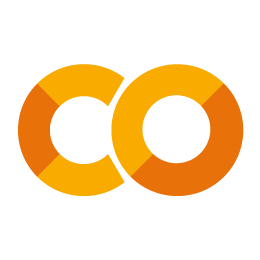

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


0: 320x640 5 persons, 166.0ms
Speed: 7.2ms preprocess, 166.0ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)


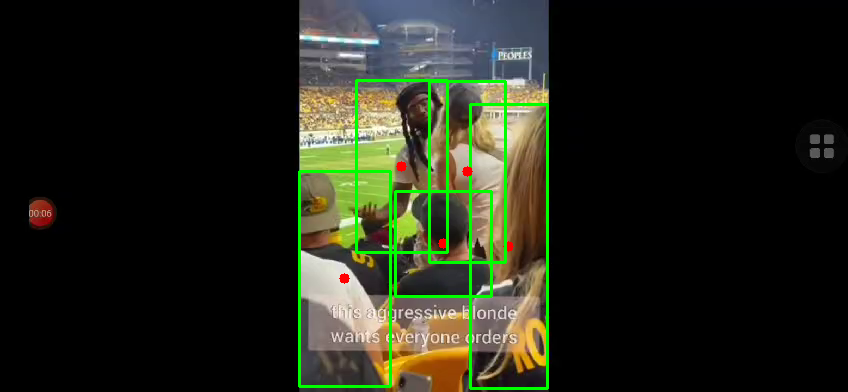


0: 320x640 4 persons, 171.8ms
Speed: 3.5ms preprocess, 171.8ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


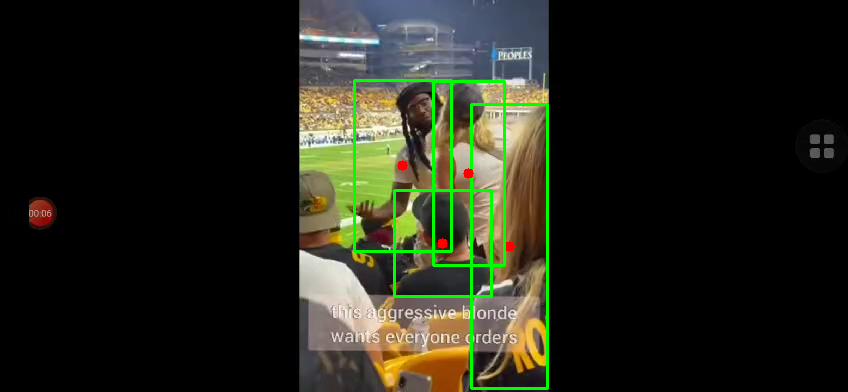


0: 320x640 5 persons, 162.8ms
Speed: 5.1ms preprocess, 162.8ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


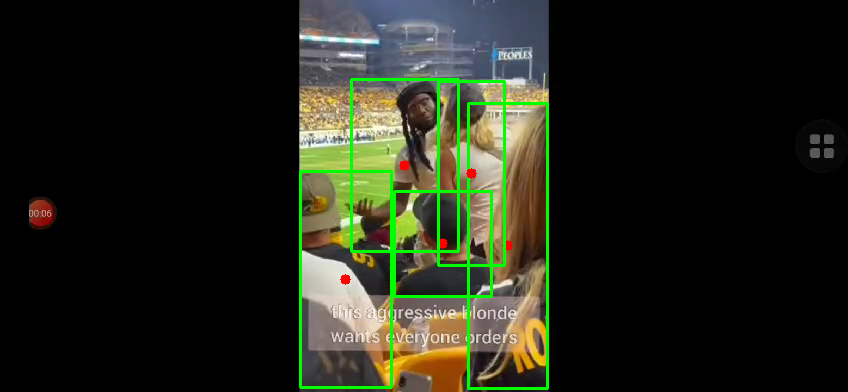


0: 320x640 5 persons, 161.7ms
Speed: 7.4ms preprocess, 161.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


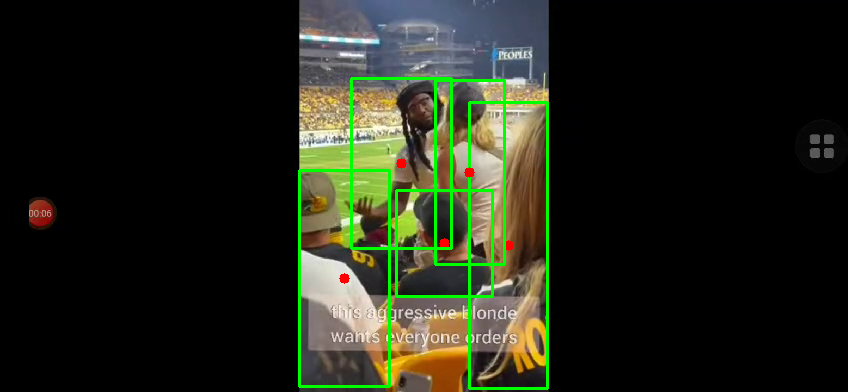


0: 320x640 5 persons, 216.6ms
Speed: 7.8ms preprocess, 216.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


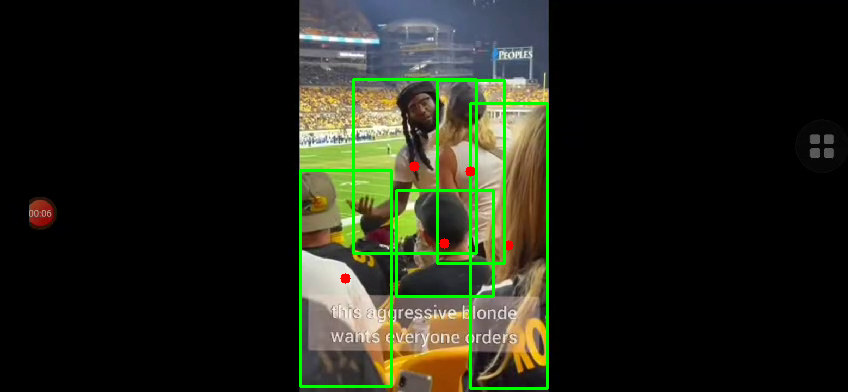


0: 320x640 4 persons, 172.0ms
Speed: 8.4ms preprocess, 172.0ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


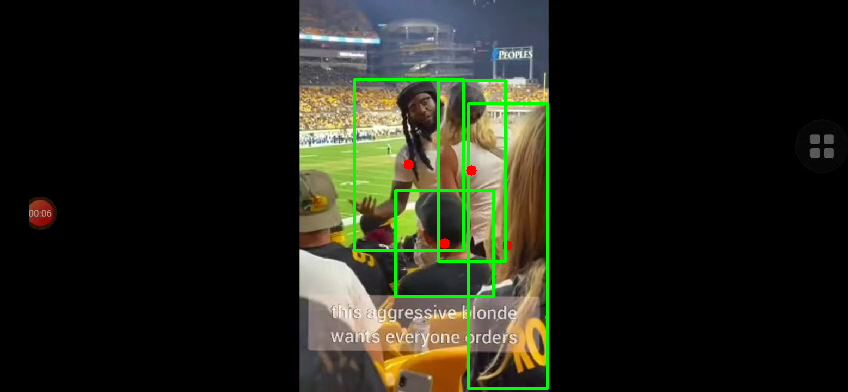


0: 320x640 5 persons, 183.3ms
Speed: 5.4ms preprocess, 183.3ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


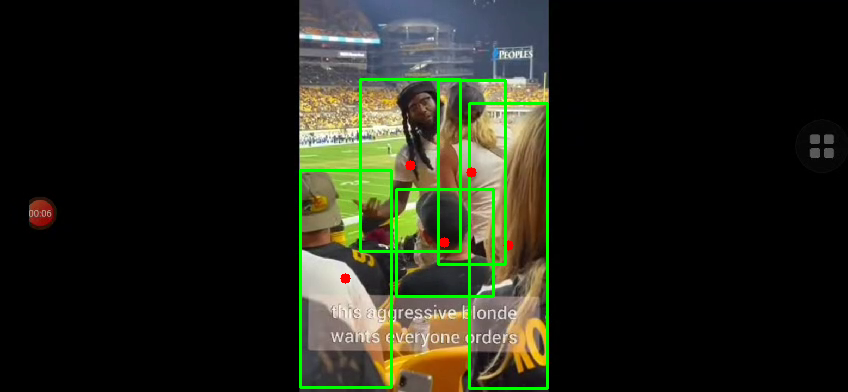


0: 320x640 5 persons, 178.3ms
Speed: 5.2ms preprocess, 178.3ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


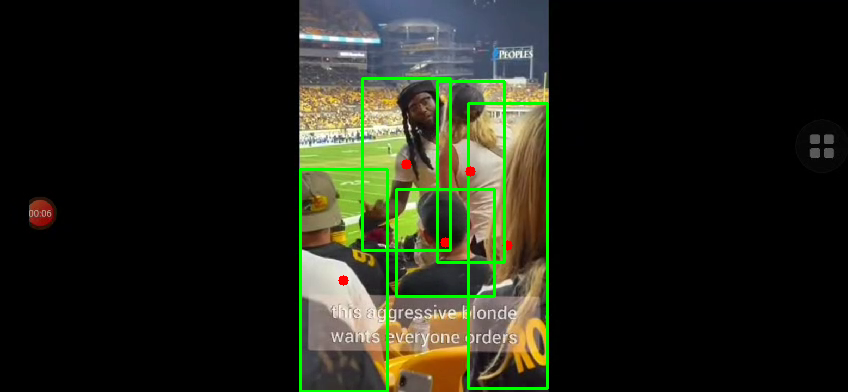


0: 320x640 5 persons, 251.2ms
Speed: 3.4ms preprocess, 251.2ms inference, 3.9ms postprocess per image at shape (1, 3, 320, 640)


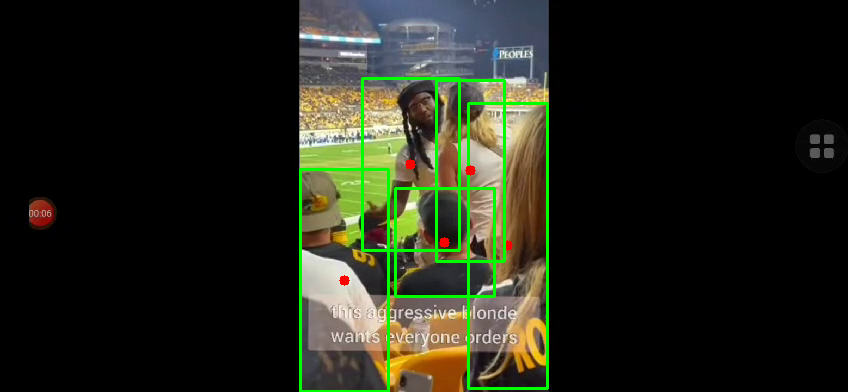


0: 320x640 5 persons, 209.4ms
Speed: 5.3ms preprocess, 209.4ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


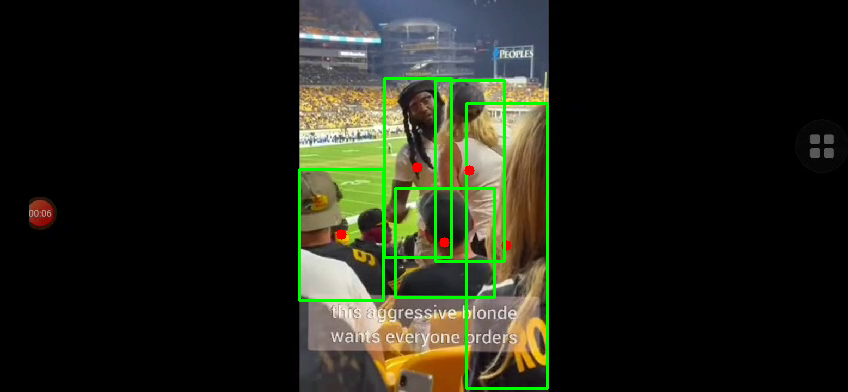


0: 320x640 6 persons, 195.1ms
Speed: 5.1ms preprocess, 195.1ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!


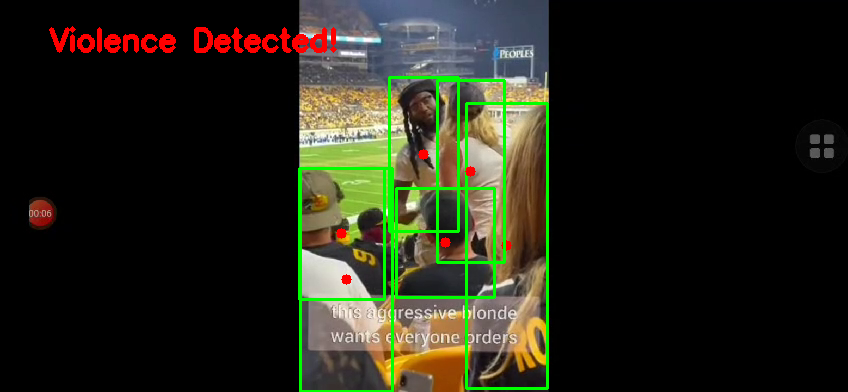


0: 320x640 4 persons, 227.8ms
Speed: 5.1ms preprocess, 227.8ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


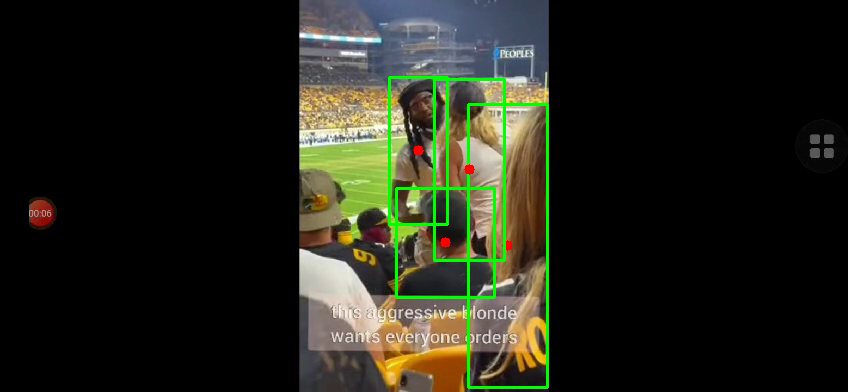


0: 320x640 7 persons, 220.9ms
Speed: 3.5ms preprocess, 220.9ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


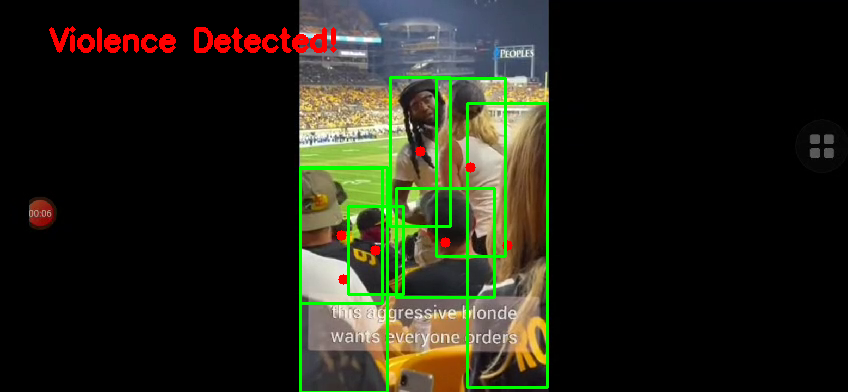


0: 320x640 6 persons, 208.3ms
Speed: 5.2ms preprocess, 208.3ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


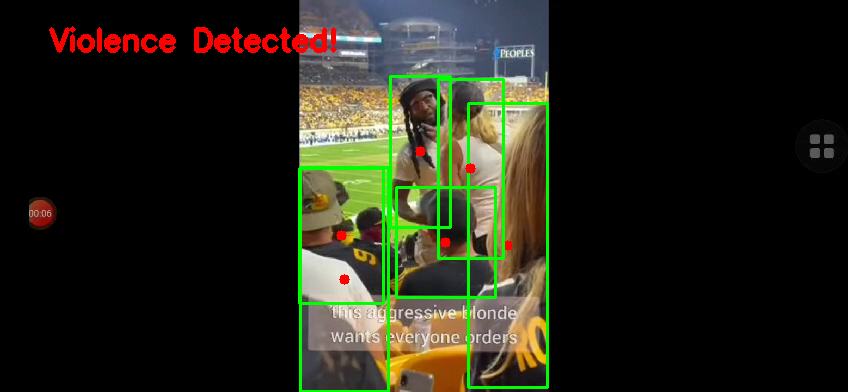


0: 320x640 7 persons, 211.2ms
Speed: 5.1ms preprocess, 211.2ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


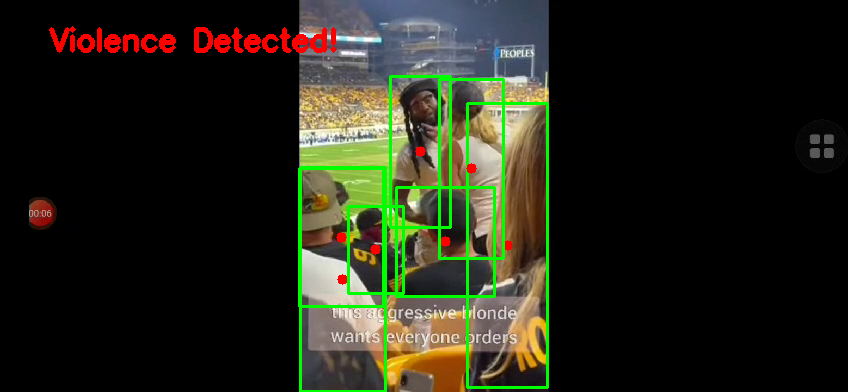


0: 320x640 7 persons, 245.9ms
Speed: 5.2ms preprocess, 245.9ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


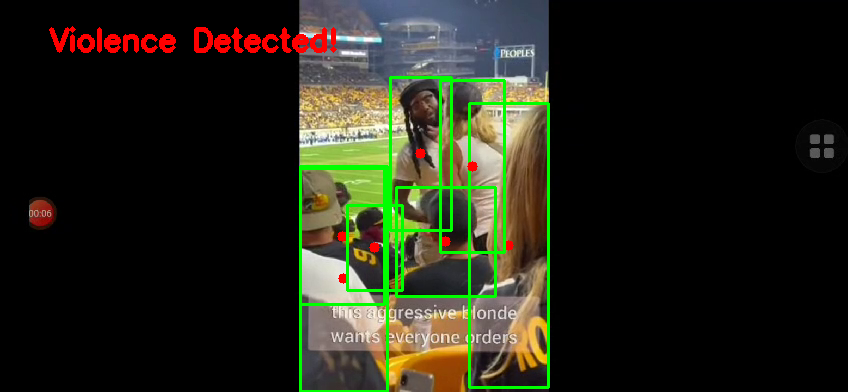


0: 320x640 7 persons, 235.7ms
Speed: 3.2ms preprocess, 235.7ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


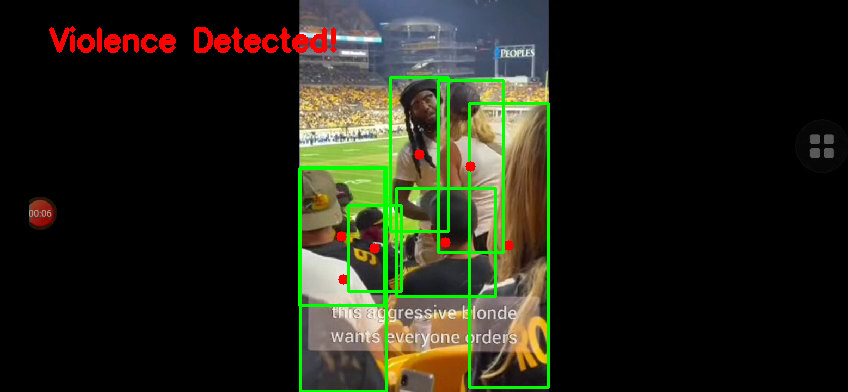


0: 320x640 7 persons, 265.3ms
Speed: 5.0ms preprocess, 265.3ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


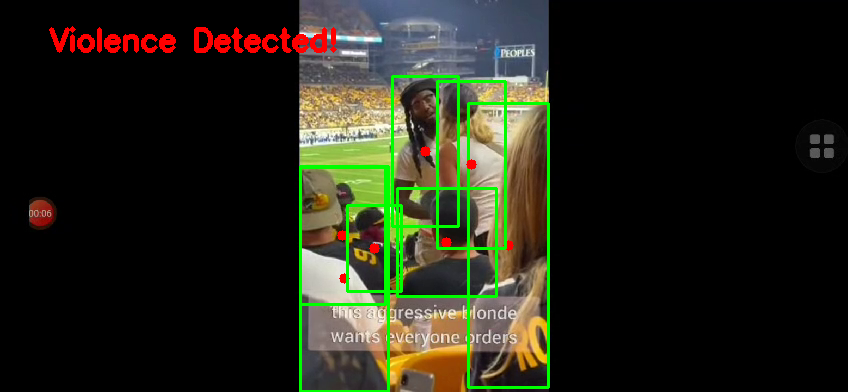


0: 320x640 8 persons, 219.4ms
Speed: 5.3ms preprocess, 219.4ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


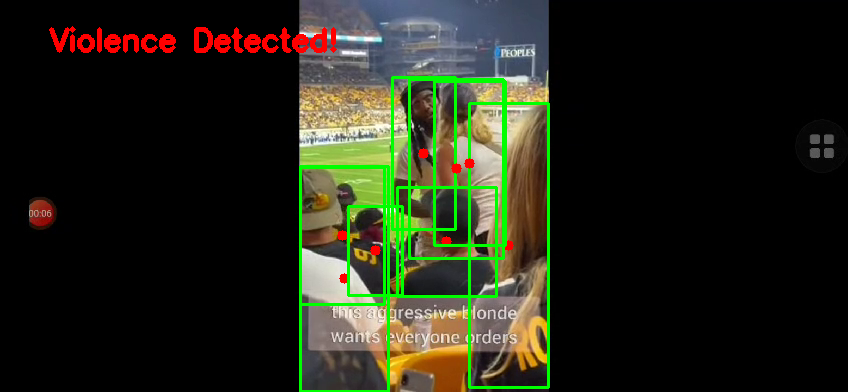


0: 320x640 5 persons, 256.6ms
Speed: 3.4ms preprocess, 256.6ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


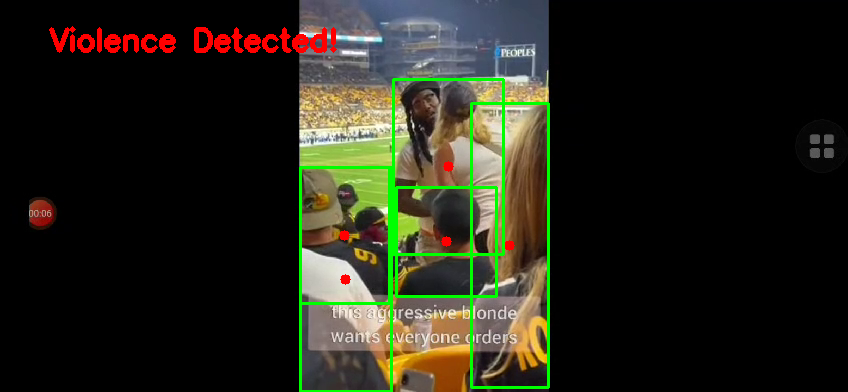


0: 320x640 6 persons, 216.0ms
Speed: 5.5ms preprocess, 216.0ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


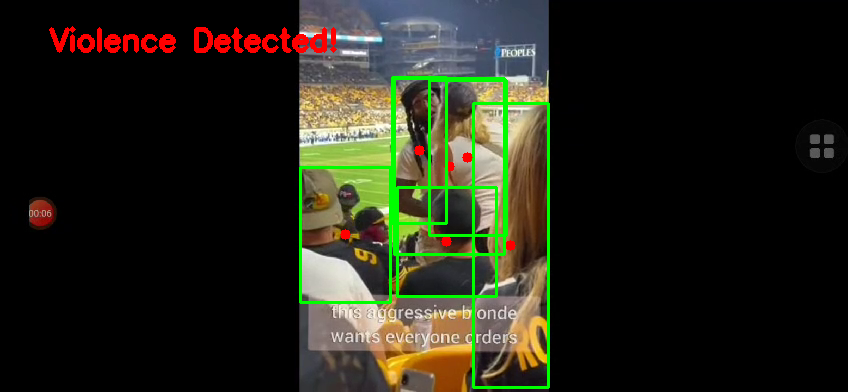


0: 320x640 7 persons, 217.4ms
Speed: 5.5ms preprocess, 217.4ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


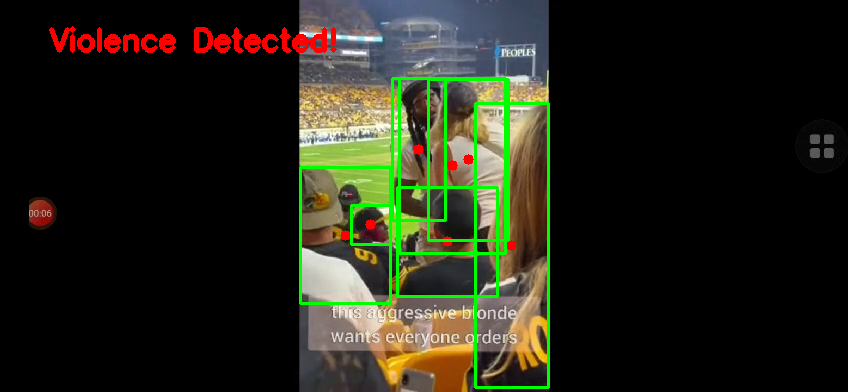


0: 320x640 7 persons, 241.8ms
Speed: 6.5ms preprocess, 241.8ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


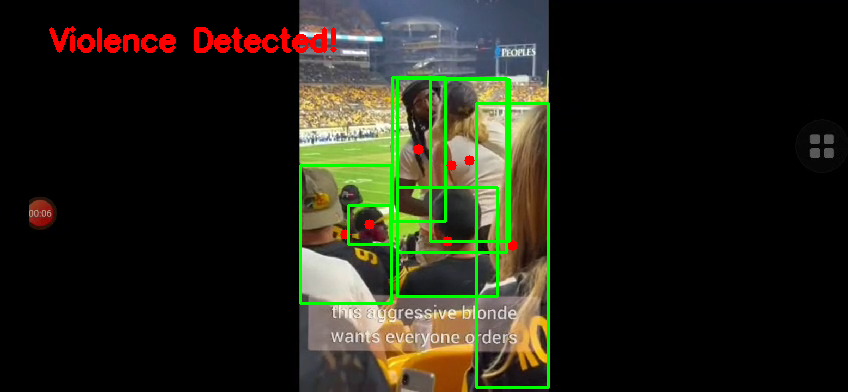


0: 320x640 6 persons, 229.5ms
Speed: 7.3ms preprocess, 229.5ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


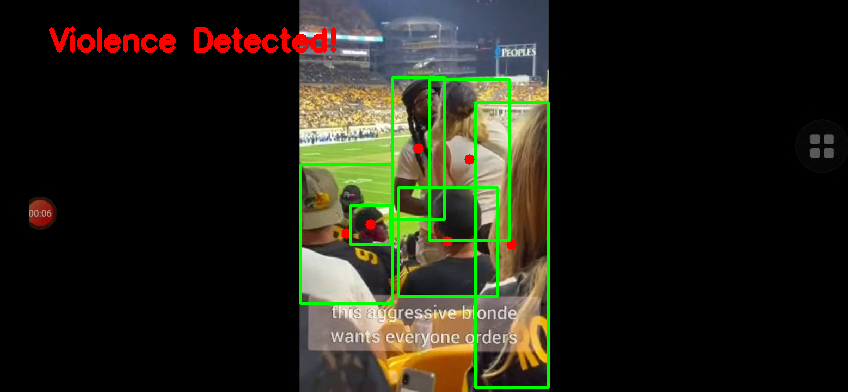


0: 320x640 6 persons, 1 chair, 211.0ms
Speed: 5.0ms preprocess, 211.0ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


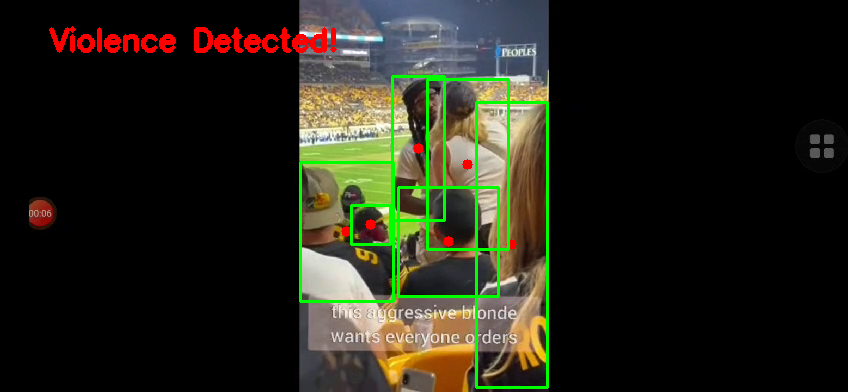


0: 320x640 6 persons, 211.7ms
Speed: 5.4ms preprocess, 211.7ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


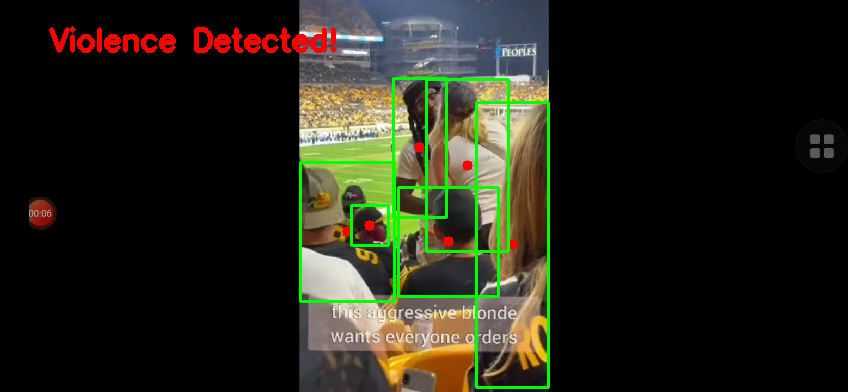


0: 320x640 7 persons, 1 chair, 229.2ms
Speed: 4.9ms preprocess, 229.2ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


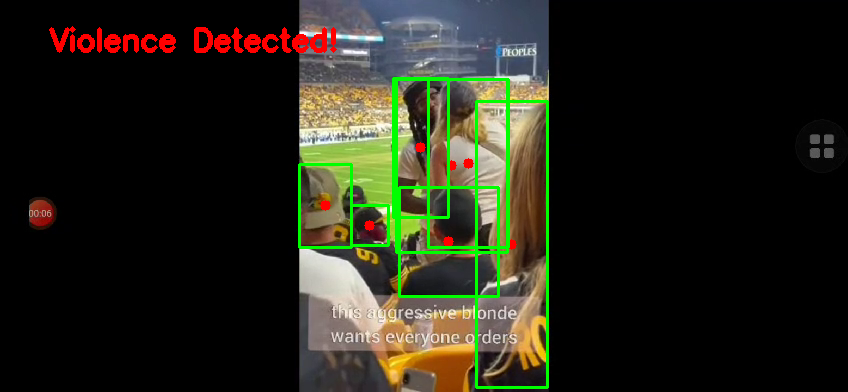


0: 320x640 6 persons, 260.5ms
Speed: 3.4ms preprocess, 260.5ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!


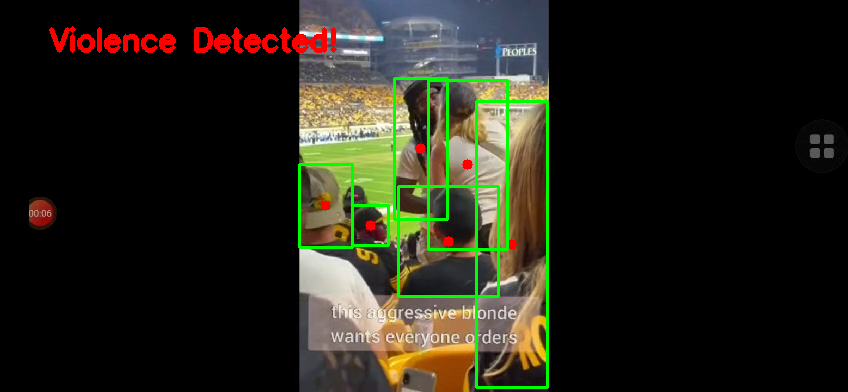


0: 320x640 7 persons, 289.9ms
Speed: 5.9ms preprocess, 289.9ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!
Possible violent altercation detected!


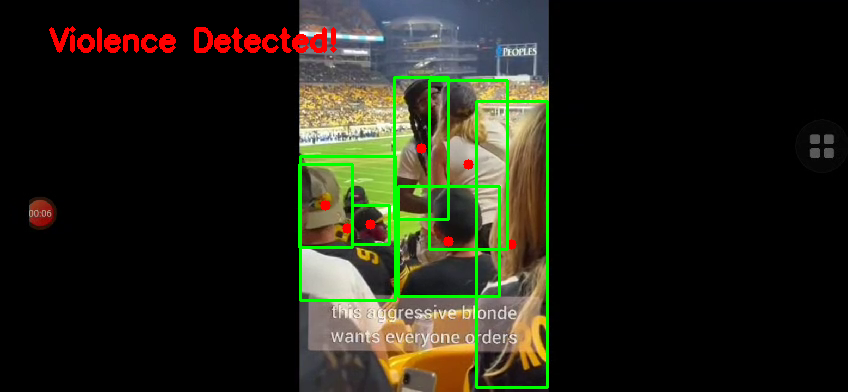


0: 320x640 6 persons, 248.8ms
Speed: 5.1ms preprocess, 248.8ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Possible violent altercation detected!


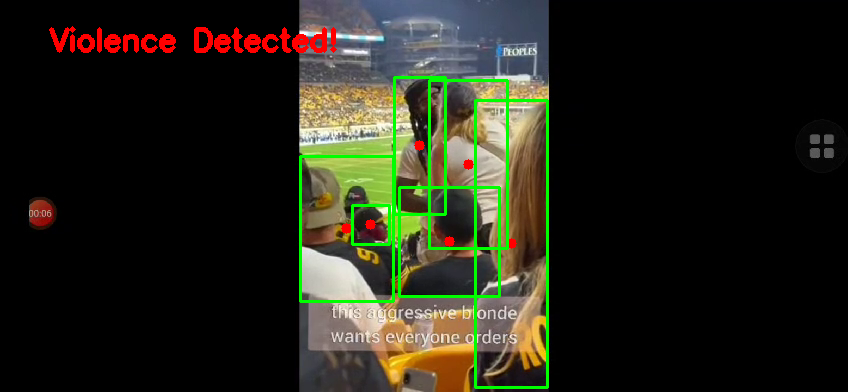

KeyboardInterrupt: 

In [14]:
# Install dependencies if needed (uncomment if necessary)
# !pip install ultralytics opencv-python numpy

import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure the model file exists or use a valid path

# Load video file from Colab's content directory
video_path = "/content/WhatsApp Video 2025-02-16 at 20.30.36.mp4"
cap = cv2.VideoCapture(video_path)

assert cap.isOpened(), "Error: Could not open video file"

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO detection
    results = model(frame)
    centers = []

    for result in results:
        for box in result.boxes:
            class_id = int(box.cls[0])  # Get class index
            if class_id == 0:  # Only process "person" class
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
                x_center = (x1 + x2) // 2
                y_center = (y1 + y2) // 2
                centers.append((x_center, y_center))

                # Draw bounding box & center
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.circle(frame, (x_center, y_center), 5, (0, 0, 255), -1)

    # Check distance between detected people
    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            x1, y1 = centers[i]
            x2, y2 = centers[j]
            distance = np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

            if distance < 50:  # Adjust threshold as needed
                print("Possible violent altercation detected!")
                cv2.putText(frame, "Violence Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                            1, (0, 0, 255), 3)

    # Show frame in Google Colab
    cv2_imshow(frame)

    # Optional: Add a short delay
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
